<a href="https://colab.research.google.com/github/SatriaImawan12/Project/blob/main/IPL_Score_Prediction_Using_Neural_Network_(Deep_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pendahuluan**

Dalam era modern kriket, di mana setiap run dan keputusan dapat mengubah hasil, penerapan **Neural Network** untuk prediksi skor IPL berada di garis depan inovasi. Project ini akan mengeksplorasi penggunaan **Neural Network** untuk **memprediksi skor IPL dalam pertandingan yang akan datang** dengan mengalisis **data historis, statistik pemain, dan kondisi pertandingan**.

#**1. Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras
import tensorflow as tf

#**2. Import Dataset**


Dataset yang digunakan adalah dataset yang berisi catatan hasil pertandingan cricket dari tahun 2008 hingga 2017. Dataset ini berisi fitur seperti venue, date, batting and bowling team, names of batsman and bowler, wickets dan lainnya. Dataset tersebut dapat [didownload disini](https://drive.google.com/file/d/1qlm4OnaAM3bdgti9xyUqK3eSFokjYdA-/view).

In [ ]:
ipl = pd.read_csv('ipl_data.csv')
ipl.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0.0,0.0,0.0,222.0
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0.0,0.0,0.0,222.0
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0.0,0.0,0.0,222.0
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0.0,0.0,0.0,222.0
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0.0,0.0,0.0,222.0


#**3. Data Pre-Processing**

##**3.1 Check Duplicated Data**

In [ ]:
ipl.duplicated().sum()

0

##**3.2 Dropping Unimportant Features**

In [ ]:
#Dropping certain features
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)

##**3.3 Check Missing Values**

In [ ]:
#Check Missing Values
df.isnull().sum()

venue        0
bat_team     0
bowl_team    0
batsman      0
bowler       0
total        1
dtype: int64

##**3.4 Label Encoding**

In [ ]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

#**4. Modelling**

In [ ]:
X = df.drop(['total'], axis =1)
y = df['total']

In [ ]:
# Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))

Epoch 1/50
832/832 [==============================] - 13s 13ms/step - loss: 32.3842 - val_loss: 22.4652
Epoch 2/50
832/832 [==============================] - 8s 10ms/step - loss: 22.3278 - val_loss: 21.9762
Epoch 3/50
832/832 [==============================] - 4s 5ms/step - loss: 22.2687 - val_loss: 21.9401
Epoch 4/50
832/832 [==============================] - 5s 6ms/step - loss: 22.1934 - val_loss: 21.8569
Epoch 5/50
832/832 [==============================] - 9s 11ms/step - loss: 22.1010 - val_loss: 21.7528
Epoch 6/50
832/832 [==============================] - 10s 12ms/step - loss: 22.0476 - val_loss: 21.6732
Epoch 7/50
832/832 [==============================] - 7s 8ms/step - loss: 21.9459 - val_loss: 22.0576
Epoch 8/50
832/832 [==============================] - 6s 7ms/step - loss: 21.8788 - val_loss: 21.5137
Epoch 9/50
832/832 [==============================] - 5s 6ms/step - loss: 21.8199 - val_loss: 21.5682
Epoch 10/50
832/832 [==============================] - 4s 5ms/step - loss: 2

<Axes: >

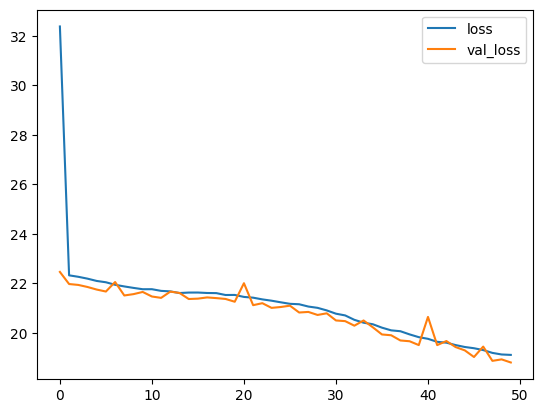

In [ ]:
model_losses = pd.DataFrame(model.history.history)
model_losses.plot()

In [ ]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)

713/713 [==============================] - 1s 2ms/step


19.296745929914564

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

import warnings
warnings.filterwarnings("ignore")

venue = widgets.Dropdown(options=df['venue'].unique().tolist(),description='Select Venue:')
batting_team = widgets.Dropdown(options =df['bat_team'].unique().tolist(),  description='Select Batting Team:')
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(),  description='Select Batting Team:')
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:')
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:')

predict_button = widgets.Button(description="Predict Score")

def predict_score(b):
    with output:
        clear_output()  # Clear the previous output


        # Decode the encoded values back to their original values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])


        input = np.array([decoded_venue,  decoded_batting_team, decoded_bowling_team,decoded_striker, decoded_bowler])
        input = input.reshape(1,5)
        input = scaler.transform(input)
        #print(input)
        predicted_score = model.predict(input)
        predicted_score = int(predicted_score[0,0])

        print(predicted_score)

In [ ]:
predict_button.on_click(predict_score)
output = widgets.Output()
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)

Dropdown(description='Select Venue:', options=('M Chinnaswamy Stadium', 'Punjab Cricket Association Stadium, M…

Dropdown(description='Select Batting Team:', options=('Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasth…

Dropdown(description='Select Batting Team:', options=('Royal Challengers Bangalore', 'Kings XI Punjab', 'Delhi…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

#**Kesimpulan**

Penerapan **Neural Network** dalam memprediksi skor IPL mewakili pendekatan transformatif terhadap olahraga kriket. Dengan memanfaatkan **Neural Network** dan data historis, tim dan analis dapat memprediksi hasil pertandingan dengan akurasi yang lebih besar dari sebelumnya. Hal ini tidak hanya meningkatkan pengambilan keputusan strategis, tetapi juga menambah pengalaman penonton dengan memberikan suatu prediksi. Seiring teknologi yang terus berkembang, berbagai inovasi analisis di bidang olahraga kriket akan semakin berbasis data, menawarkan peluang baru untuk mengungkap kompleksitas permainan dan meningkatkan keunggulan kompetitifnya.